Download data from 2016 to 2021, UNICEF, Kids under 5 with Stunt and Severe stunting. 
https://data.unicef.org/resources/data_explorer/unicef_f/?ag=UNICEF&df=GLOBAL_DATAFLOW&ver=1.0&dq=.NT_ANT_HAZ_NE2+NT_ANT_HAZ_NE3..&startPeriod=2016&endPeriod=2021

download essential library

In [149]:
import numpy as np 
import pandas as pd 
import scipy as sp
import matplotlib.pyplot as plt # plot
from sklearn import linear_model # linear regression
import statsmodels.api as sm
from seaborn import heatmap



In [150]:
stunt = pd.read_csv('stunt_data.csv')

In [151]:
stunt.head(5)

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,2018,38.100000,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9303.1,Height/length modality (standing/lying) was no...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),M: Male,2018,38.300000,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9842.2,Height/length modality (standing/lying) was no...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),_T: Total,2018,38.200000,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,19145.3,Height/length modality (standing/lying) was no...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,UNDEV_002: Africa,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),_T: Total,2017,29.962072,0: Units,PCNT: %,NaN,NaN,...,NaN,NaN,UNICEF/WHO/World Bank Joint Child Malnutrition...,NaN,"https,//data.unicef.org/topic/nutrition/malnut...",UNICEF-WHO-World Bank,MOF: Middle of fieldwork,NaN,NaN,Y0T4: Under 5 years old
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,UNDEV_002: Africa,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),_T: Total,2018,29.544872,0: Units,PCNT: %,NaN,NaN,...,NaN,NaN,UNICEF/WHO/World Bank Joint Child Malnutrition...,NaN,"https,//data.unicef.org/topic/nutrition/malnut...",UNICEF-WHO-World Bank,MOF: Middle of fieldwork,NaN,NaN,Y0T4: Under 5 years old


In [152]:
sev_stunt = pd.read_csv('severe_stunt_data.csv')

In [153]:
sev_stunt.head(5)

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE3: Height-for-age <-3 SD (Severe ...,F: Female,2018,20.0,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9303.1,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE3: Height-for-age <-3 SD (Severe ...,M: Male,2018,18.8,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9842.2,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE3: Height-for-age <-3 SD (Severe ...,_T: Total,2018,19.4,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,19145.3,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ALB: Albania,NT_ANT_HAZ_NE3: Height-for-age <-3 SD (Severe ...,F: Female,2017,4.0,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,1137.6,NaN,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Albania Demographic and Health Survey 2017-18....,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2000-2017,Y0T4: Under 5 years old
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ALB: Albania,NT_ANT_HAZ_NE3: Height-for-age <-3 SD (Severe ...,M: Male,2017,3.9,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,1184.4,NaN,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Albania Demographic and Health Survey 2017-18....,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2000-2017,Y0T4: Under 5 years old


In [154]:
#data cleaning, leave essential columns

In [155]:
# rename columns
stunt=stunt.rename(columns={'REF_AREA:Geographic area':'Country','INDICATOR:Indicator':'Indicator','SEX:Sex':'Gender','TIME_PERIOD:Time period':'Year','OBS_VALUE:Observation Value':'Stunt_Percent','UNIT_MEASURE:Unit of measure':'Unit','AGE:Current age':'Age'})

In [156]:
stunt.head(5)

,DATAFLOW,Country,Indicator,Gender,Year,Stunt_Percent,UNIT_MULTIPLIER:Unit multiplier,Unit,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,Age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,2018,38.100000,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9303.1,Height/length modality (standing/lying) was no...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),M: Male,2018,38.300000,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9842.2,Height/length modality (standing/lying) was no...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),_T: Total,2018,38.200000,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,19145.3,Height/length modality (standing/lying) was no...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,UNDEV_002: Africa,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),_T: Total,2017,29.962072,0: Units,PCNT: %,NaN,NaN,...,NaN,NaN,UNICEF/WHO/World Bank Joint Child Malnutrition...,NaN,"https,//data.unicef.org/topic/nutrition/malnut...",UNICEF-WHO-World Bank,MOF: Middle of fieldwork,NaN,NaN,Y0T4: Under 5 years old
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,UNDEV_002: Africa,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),_T: Total,2018,29.544872,0: Units,PCNT: %,NaN,NaN,...,NaN,NaN,UNICEF/WHO/World Bank Joint Child Malnutrition...,NaN,"https,//data.unicef.org/topic/nutrition/malnut...",UNICEF-WHO-World Bank,MOF: Middle of fieldwork,NaN,NaN,Y0T4: Under 5 years old


In [157]:
stunt.Indicator.unique() #make sure all the same for indicator, unit, and age

array(['NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting)'], dtype=object)

In [158]:
stunt.Unit.unique()

array(['PCNT: %'], dtype=object)

In [159]:
stunt.Age.unique()

array(['Y0T4: Under 5 years old'], dtype=object)

In [160]:
n=len(stunt.Country.unique()) #157 countries
print(str(n)+' countries')

157 countries


In [179]:
stunt_df=stunt[['Country','Gender','Year','Stunt_Percent']]
stunt_df.head(5)

,Country,Gender,Year,Stunt_Percent
0,AFG: Afghanistan,F: Female,2018,38.100000
1,AFG: Afghanistan,M: Male,2018,38.300000
2,AFG: Afghanistan,_T: Total,2018,38.200000
3,UNDEV_002: Africa,_T: Total,2017,29.962072
4,UNDEV_002: Africa,_T: Total,2018,29.544872


In [211]:
# Noticed the repeated countries from difference sources
#stunt_df['Country_name']=
stunt_df['country_name']=stunt_df['Country'].str.extract(':(.*)',expand=True)
#print(type(country_name))
display(stunt_df[:5])

/var/folders/qp/gg4gsq8d0ss5h1nfck_8gdq40000gn/T/ipykernel_71365/2883261864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stunt_df['country_name']=stunt_df['Country'].str.extract(':(.*)',expand=True)


,Country,Gender,Year,Stunt_Percent,country_name
0,AFG: Afghanistan,F: Female,2018,38.100000,Afghanistan
1,AFG: Afghanistan,M: Male,2018,38.300000,Afghanistan
2,AFG: Afghanistan,_T: Total,2018,38.200000,Afghanistan
3,UNDEV_002: Africa,_T: Total,2017,29.962072,Africa
4,UNDEV_002: Africa,_T: Total,2018,29.544872,Africa


In [206]:
stunt_df_group=stunt_df.groupby(by=['Year','country_name'],as_index=False).apply(lambda a: a[:])
display(stunt_df_group)


Country     Gender  Year  \
0   3                                    UNDEV_002: Africa  _T: Total  2017   
    8                                     WHO_AFRO: Africa  _T: Total  2017   
1   13                                        ALB: Albania  F: Female  2017   
    14                                        ALB: Albania    M: Male  2017   
    15                                        ALB: Albania  _T: Total  2017   
...                                                    ...        ...   ...   
365 668       WB_INCOME: World Bank income groups - Global  _T: Total  2021   
366 673  WHO_REG_GLOBAL: World Health Organisation regi...  _T: Total  2021   
367 678           WB_REG_GLOBAL: World bank World - Global  _T: Total  2021   
368 689         UNSDG_SUBSAHARANAFRICA: sub-Saharan Africa  _T: Total  2021   
    694                         WB_SSA: sub-Saharan Africa  _T: Total  2021   

         Stunt_Percent                                 country_name  
0   3        29.962072                                       Africa  
    8        33.465652                                       Africa  
1   13       11.000000                                      Albania  
    14       11.600000                                      Albania  
    15       11.300000                                      Albania  
...                ...                                          ...  
365 668      20.476143            World Bank income groups - Global  
366 673      20.476143   World Health Organisation regions - Global  
367 678      20.476143                    World bank World - Global  
368 689      30.226891                           sub-Saharan Africa  
    694      32.005920                           sub-Saharan Africa  

[700 rows x 5 columns]

In [207]:
stunt_df_group.country_name.unique()

array([' Africa', ' Albania', ' Americas', ' Asia', ' Burkina Faso',
       ' Caribbean', ' Central America', ' Central Asia',
       ' Central and Southern Asia', ' Chad', ' China',
       " Democratic People's Republic of Korea",
       ' Democratic Republic of the Congo', ' East Asia and Pacific',
       ' Eastern Africa', ' Eastern Asia',
       ' Eastern Europe and Central Asia', ' Eastern Mediterranean',
       ' Eastern and South-Eastern Asia', ' Eastern and Southern Africa',
       ' Europe and Central Asia', ' Ghana', ' Haiti', ' India',
       ' Kuwait', " Lao People's Democratic Republic",
       ' Latin America & the Caribbean', ' Latin America and Caribbean',
       ' Latin America and the Caribbean', ' Least developed countries',
       ' Less Developed Regions', ' Low income food deficient countries',
       ' Malawi', ' Maldives', ' Mali', ' Marshall Islands',
       ' Middle Africa', ' Middle East and North Africa', ' Morocco',
       ' North America', ' Northern Afric

In [171]:
stunt_df.Gender.unique()

array(['F: Female', 'M: Male', '_T: Total', nan], dtype=object)

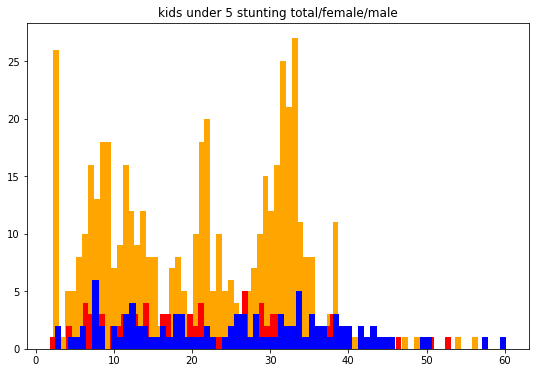

In [190]:
#create histogram to observe
# filter only total
total_stunt=stunt_df[stunt_df['Gender']=='_T: Total'].sort_values(by='Stunt_Percent')
f_stunt=stunt_df[stunt_df['Gender']=='F: Female'].sort_values(by='Stunt_Percent')
m_stunt=stunt_df[stunt_df['Gender']=='M: Male'].sort_values(by='Stunt_Percent')
#m_stunt=stunt_df[(stunt_df['Gender']=='M: Male')&(stunt_df['Year']=='2021')].sort_values(by='Stunt_Percent')

#display(total_stunt)
#print(len(total_stunt))
plt.figure(figsize=(9,6))
plt.hist(total_stunt['Stunt_Percent'],bins=73,color='orange')
plt.hist(f_stunt['Stunt_Percent'],bins=73,color='red')
plt.hist(m_stunt['Stunt_Percent'],bins=73,color='blue')
plt.title('kids under 5 stunting total/female/male')
plt.show()

Text(0.5, 1.0, 'Stunt percent')

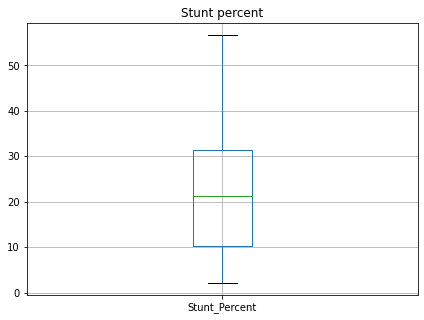

In [191]:
fig=total_stunt.boxplot(column=['Stunt_Percent'],figsize=(7,5))
fig.set_title("Stunt percent")


In [192]:
# SEVERE

In [193]:
sev_stunt=sev_stunt.rename(columns={'REF_AREA:Geographic area':'Country','INDICATOR:Indicator':'Indicator','SEX:Sex':'Gender','TIME_PERIOD:Time period':'Year','OBS_VALUE:Observation Value':'Stunt_Percent','UNIT_MEASURE:Unit of measure':'Unit','AGE:Current age':'Age'})
sev_stunt_df=sev_stunt[['Country','Gender','Year','Stunt_Percent']]
display(sev_stunt_df)


,Country,Gender,Year,Stunt_Percent
0,AFG: Afghanistan,F: Female,2018,20.0
1,AFG: Afghanistan,M: Male,2018,18.8
2,AFG: Afghanistan,_T: Total,2018,19.4
3,ALB: Albania,F: Female,2017,4.0
4,ALB: Albania,M: Male,2017,3.9
...,...,...,...,...
296,ZMB: Zambia,M: Male,2018,13.6
297,ZMB: Zambia,_T: Total,2018,11.8
298,ZWE: Zimbabwe,F: Female,2019,4.7
299,ZWE: Zimbabwe,M: Male,2019,6.7


/var/folders/qp/gg4gsq8d0ss5h1nfck_8gdq40000gn/T/ipykernel_71365/3684694942.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_s_stunt=sev_stunt_df[stunt_df['Gender']=='_T: Total'].sort_values(by='Stunt_Percent')
/var/folders/qp/gg4gsq8d0ss5h1nfck_8gdq40000gn/T/ipykernel_71365/3684694942.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f_s_stunt=sev_stunt_df[stunt_df['Gender']=='F: Female'].sort_values(by='Stunt_Percent')
/var/folders/qp/gg4gsq8d0ss5h1nfck_8gdq40000gn/T/ipykernel_71365/3684694942.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m_s_stunt=sev_stunt_df[stunt_df['Gender']=='M: Male'].sort_values(by='Stunt_Percent')


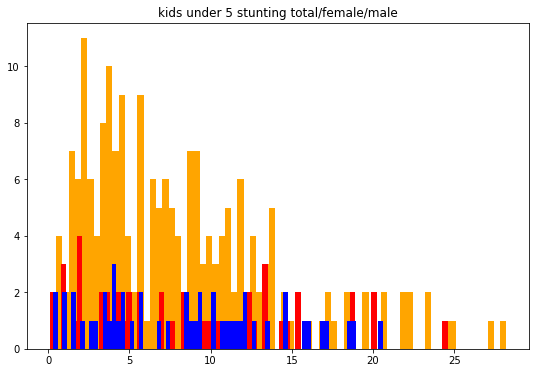

In [194]:
#create histogram to observe
# filter only total
total_s_stunt=sev_stunt_df[stunt_df['Gender']=='_T: Total'].sort_values(by='Stunt_Percent')
f_s_stunt=sev_stunt_df[stunt_df['Gender']=='F: Female'].sort_values(by='Stunt_Percent')
m_s_stunt=sev_stunt_df[stunt_df['Gender']=='M: Male'].sort_values(by='Stunt_Percent')
#m_stunt=stunt_df[(stunt_df['Gender']=='M: Male')&(stunt_df['Year']=='2021')].sort_values(by='Stunt_Percent')

#display(total_stunt)
#print(len(total_stunt))
plt.figure(figsize=(9,6))
plt.hist(total_s_stunt['Stunt_Percent'],bins=73,color='orange')
plt.hist(f_s_stunt['Stunt_Percent'],bins=73,color='red')
plt.hist(m_s_stunt['Stunt_Percent'],bins=73,color='blue')
plt.title('kids under 5 stunting total/female/male')
plt.show()

Text(0.5, 1.0, 'Severe Stunt percent')

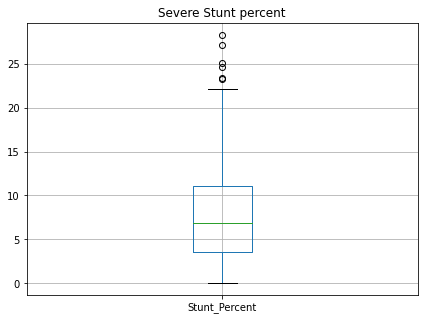

In [187]:
fig=total_s_stunt.boxplot(column=['Stunt_Percent'],figsize=(7,5))
fig.set_title("Severe Stunt percent")

In [208]:
# find dataset with country code, and combine with income level, education level, and maybe 

In [214]:
# import geopandas
# test change

ModuleNotFoundError: No module named 'geopandas'